In [1]:
from google.colab import files


uploaded = files.upload()

Saving Hackathon_Ideal_Data.csv (1).zip to Hackathon_Ideal_Data.csv (1).zip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()
import plotly.express as px
df = pd.read_csv('Hackathon_Ideal_Data.csv (1).zip')
df.head()

,MONTH,STORECODE,QTY,VALUE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
0,M1,P1,25,83,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE HAIR FALL RESCUE
1,M1,P1,6,22,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE INTENSE REPAIR
2,M1,P1,4,15,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,DOVE,DOVE OXYGEN MOISTURE
3,M1,P1,15,60,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,L'OREAL INDIA,GARNIER,FRUCTIS
4,M1,P2,0,0,HAIR CONDITIONERS,HAIR CONDITIONERS,HAIR CONDITIONERS,HINDUSTAN UNILEVER LIMITED,CLINIC PLUS,CLINIC PLUS


In [40]:
sns.pairplot(df,kind="scatter",hue='CMP')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [45]:
df.dtypes

MONTH        object
STORECODE    object
QTY           int64
VALUE         int64
GRP          object
SGRP         object
SSGRP        object
CMP          object
MBRD         object
BRD          object
dtype: object

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14260 entries, 0 to 14259
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MONTH      14260 non-null  object
 1   STORECODE  14260 non-null  object
 2   QTY        14260 non-null  int64 
 3   VALUE      14260 non-null  int64 
 4   GRP        14260 non-null  object
 5   SGRP       14260 non-null  object
 6   SSGRP      14260 non-null  object
 7   CMP        14260 non-null  object
 8   MBRD       14260 non-null  object
 9   BRD        14260 non-null  object
dtypes: int64(2), object(8)
memory usage: 1.1+ MB


In [4]:
df.describe()

,QTY,VALUE
count,14260.000000,14260.000000
mean,16.354488,294.455330
std,34.365583,760.129558
min,0.000000,0.000000
25%,1.000000,10.000000
50%,4.000000,99.000000
75%,16.000000,283.000000
max,641.000000,24185.000000


from matplotlib import pyplot as plt
_df_0['QTY'].plot(kind='hist', bins=20, title='QTY')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['VALUE'].plot(kind='hist', bins=20, title='VALUE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='QTY', y='VALUE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['QTY'].plot(kind='line', figsize=(8, 4), title='QTY')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['VALUE'].plot(kind='line', figsize=(8, 4), title='VALUE')
plt.gca().spines[['top', 'right']].set_visible(False)

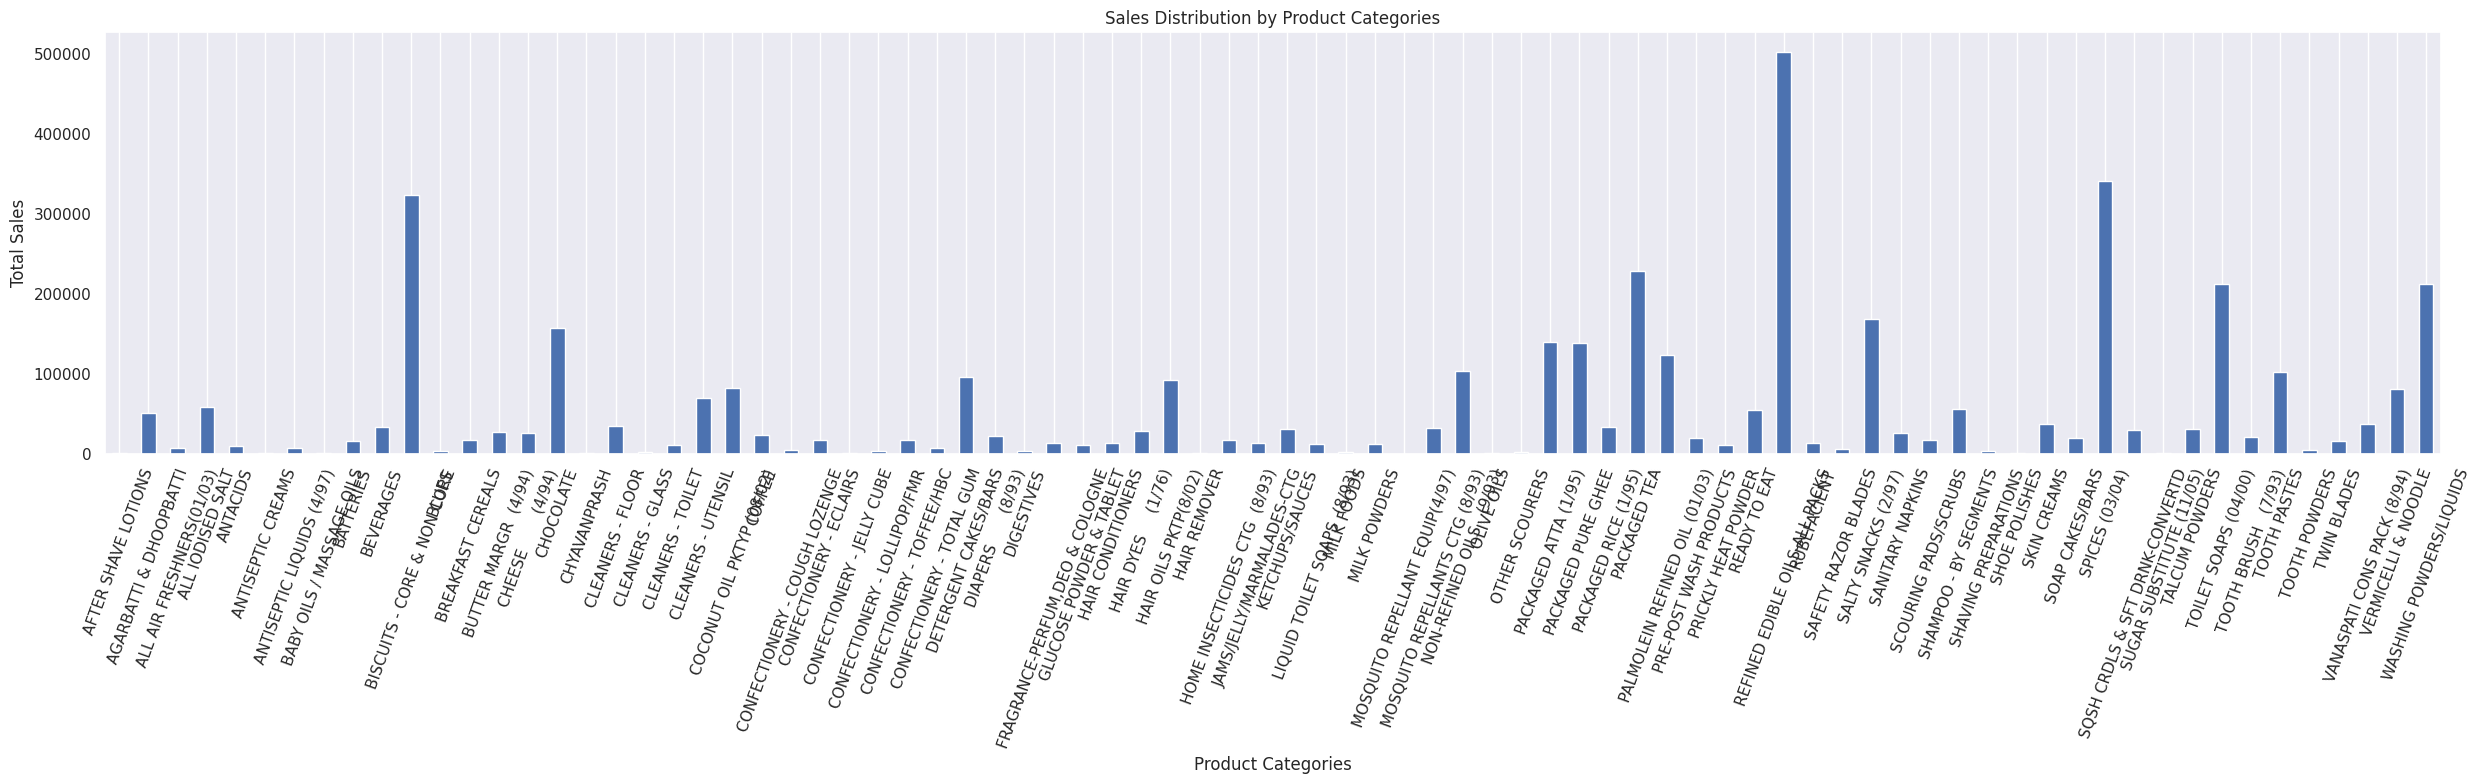

In [28]:
category_sales = df.groupby('GRP')['VALUE'].sum()
plt.figure(figsize=(25, 8))
category_sales.plot(kind='bar')
plt.title('Sales Distribution by Product Categories')
plt.xlabel('Product Categories')
plt.ylabel('Total Sales')
plt.xticks(rotation=70)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

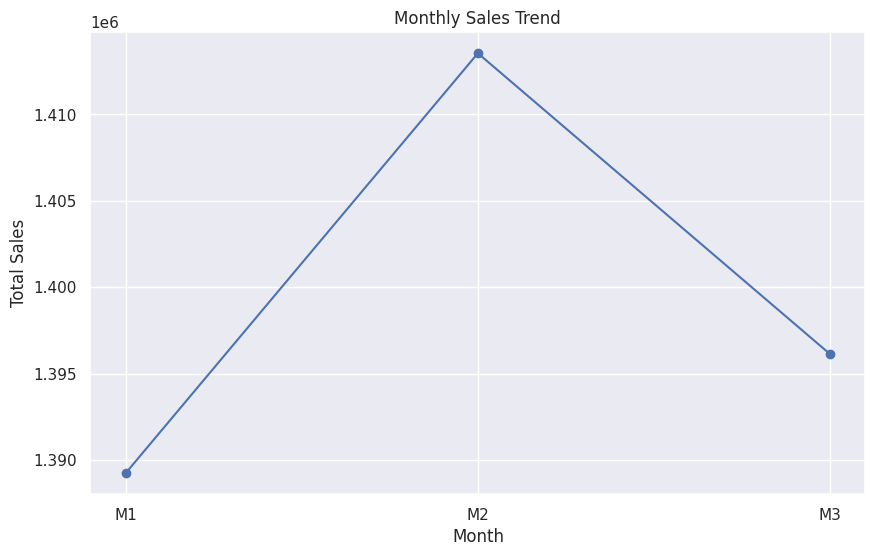

In [7]:
monthly_sales = df.groupby('MONTH').sum()

# Plot the trend of monthly sales
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales['VALUE'], marker='o', linestyle='-')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [8]:
df.columns

Index(['MONTH', 'STORECODE', 'QTY', 'VALUE', 'GRP', 'SGRP', 'SSGRP', 'CMP',
       'MBRD', 'BRD'],
      dtype='object')

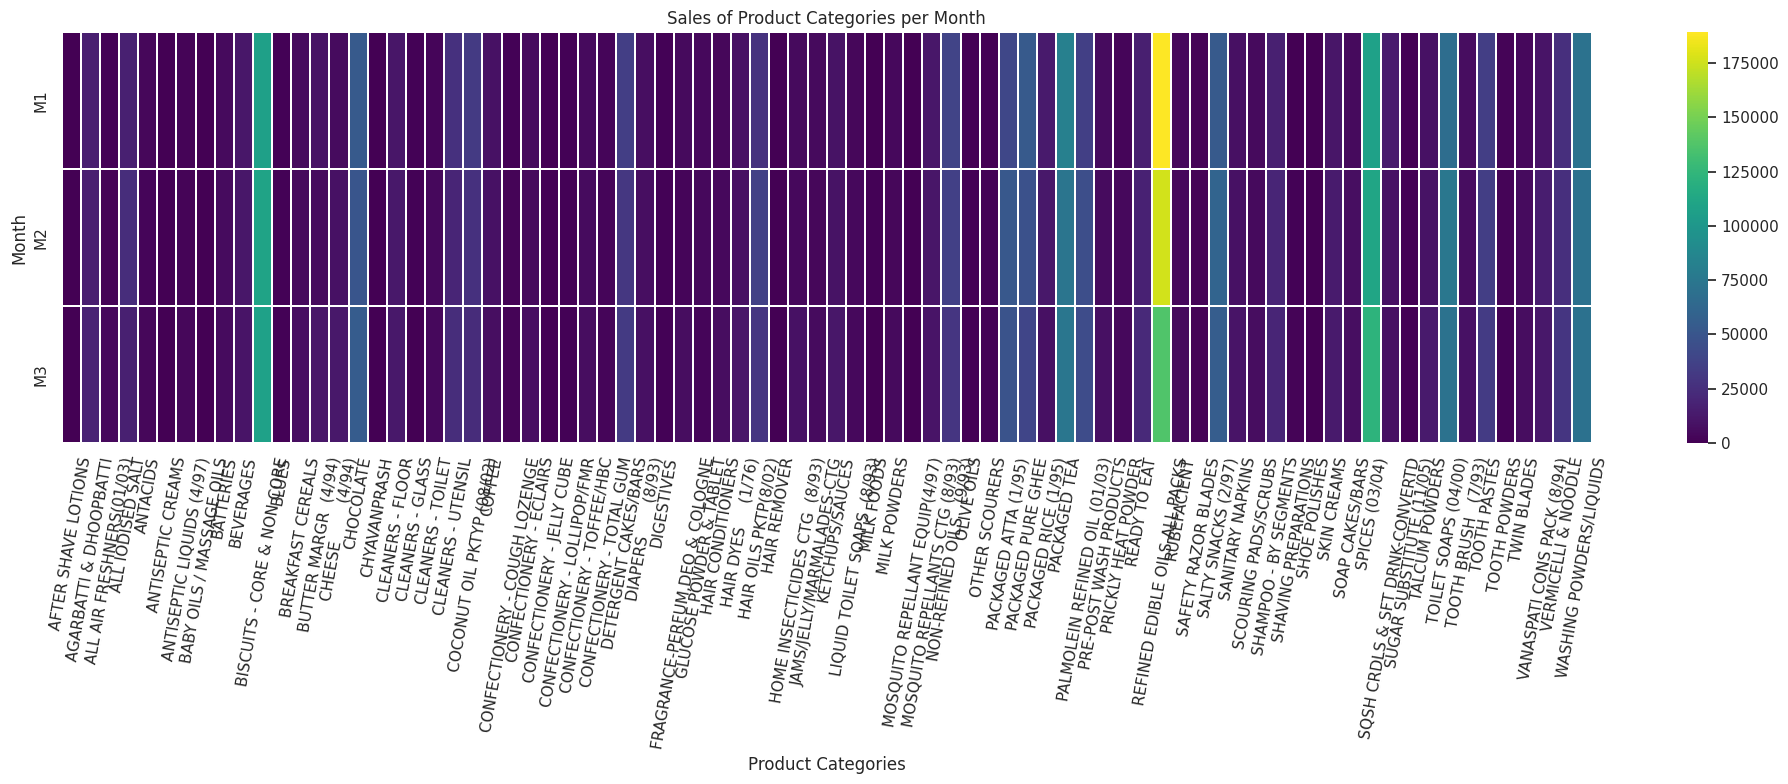

In [33]:
monthly_category_sales = df.groupby(['MONTH', 'GRP'])['VALUE'].sum().reset_index()
pivot_table = monthly_category_sales.pivot(index='MONTH', columns='GRP', values='VALUE')
plt.figure(figsize=(20, 8))
sns.heatmap(pivot_table, cmap='viridis', linecolor='white', linewidths=0.1)
plt.title('Sales of Product Categories per Month')
plt.xlabel('Product Categories')
plt.ylabel('Month')
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

In [10]:
brand_sales = df.groupby('MBRD')['VALUE'].sum()


total_sales = df['VALUE'].sum()


brand_percentages = (brand_sales / total_sales) * 100


print(brand_percentages)

MBRD
5 STAR       0.355090
50-50        0.218746
7 O'CLOCK    0.008335
77           0.062040
77 GREEN     0.000929
               ...   
Z            0.013575
ZANDU        0.100002
ZATPAT       0.003810
ZED BLACK    0.063588
ZOOPY        0.027698
Name: VALUE, Length: 818, dtype: float64


In [13]:
df.tail(3)

,MONTH,STORECODE,QTY,VALUE,GRP,SGRP,SSGRP,CMP,MBRD,BRD
14257,M1,P6,0,0,SUGAR SUBSTITUTE (11/05),PELLETS (SUGAR SUBST),PELLETS (SUGAR SUBST),ZYDUS WELLNESS LTD,SUGAR FREE,SUGAR FREE GOLD
14258,M1,P10,0,0,SUGAR SUBSTITUTE (11/05),POWDER (SUGAR SUBST),POWDER (SUGAR SUBST),ZYDUS WELLNESS LTD,SUGAR FREE,SUGAR FREE GOLD
14259,M1,P8,1,62,SUGAR SUBSTITUTE (11/05),PELLETS (SUGAR SUBST),PELLETS (SUGAR SUBST),ZYDUS WELLNESS LTD,SUGAR FREE,SUGAR FREE GOLD


In [15]:
sales_per_store = df.groupby('STORECODE')['VALUE'].sum().reset_index()
sales_per_store.sort_values(by='VALUE',ascending=False,inplace=True)
sales_per_store.head(3)

,STORECODE,VALUE
8,P8,671988
7,P7,571136
6,P6,502627


from matplotlib import pyplot as plt
_df_5['VALUE'].plot(kind='hist', bins=20, title='VALUE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('STORECODE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['VALUE'].plot(kind='line', figsize=(8, 4), title='VALUE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['STORECODE'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='VALUE', y='STORECODE', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [16]:
most_bought_product = df['GRP'].value_counts().idxmax()
frequency = df['GRP'].value_counts().max()

print(f"The most bought product is '{most_bought_product}' with a frequency of {frequency}.")

The most bought product is 'SPICES (03/04)' with a frequency of 1683.


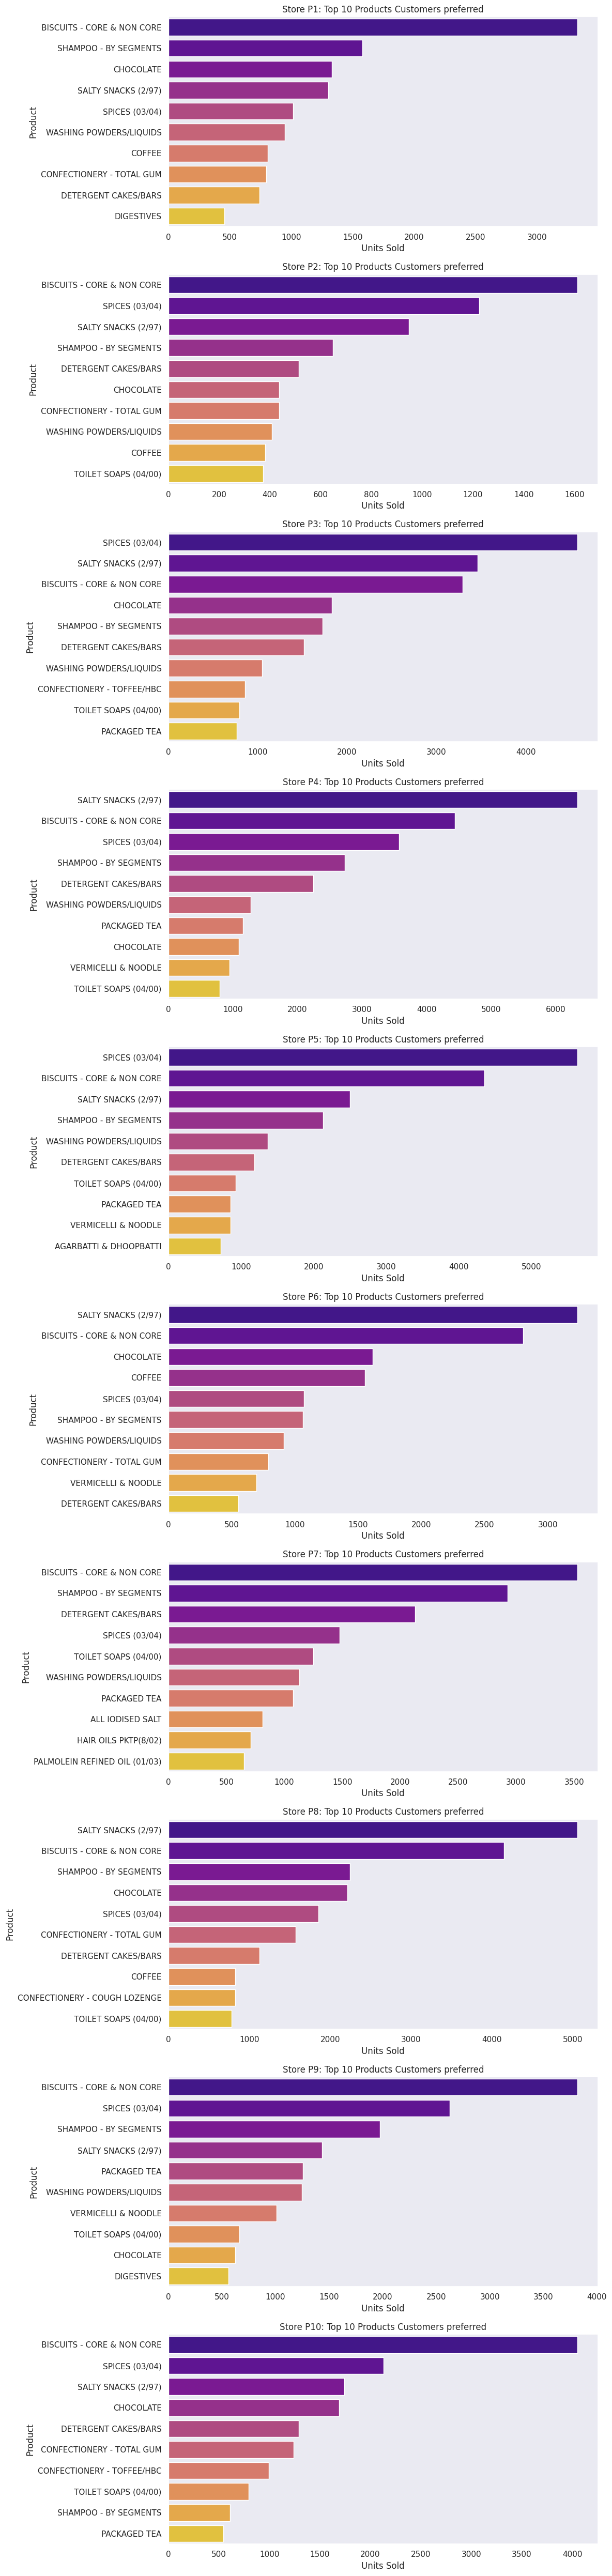

In [19]:
stores = df['STORECODE'].unique()

plt.figure(figsize=(12, 5 * len(stores)))
palettes = ['hls', 'RdPu', 'Blues', 'Greens']

for i, store in enumerate(stores, 1):
    store_data = df[df['STORECODE'] == store]
    most_bought_product_in_each_store = store_data.groupby(['STORECODE', 'GRP'])['QTY'].sum().sort_values(ascending=False).reset_index()
    plt.subplot(len(stores), 1, i)
    sns.barplot(x='QTY', y='GRP', data=most_bought_product_in_each_store[:10], palette='plasma')
    plt.grid(axis='x')
    plt.xlabel('Units Sold')
    plt.ylabel('Product')
    plt.title(f"Store {store}: Top 10 Products Customers preferred")
plt.tight_layout()
plt.show()